# Project7 - Image Classification using Deep CNN in Keras.


<h1>Context<h1/>

Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stage

## Objective:
To implement the techniques learnt as a part of the course.

<h1>Learning Outcomes<h1/>

- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

# 1.- Import the libraries, load dataset, print shape of data, visualize the images in dataset

In [4]:
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [5]:
labels = pd.read_csv('sample_data/Labels.csv')    # Load the Labels.csv by providing the path to the file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset = np.load('sample_data/images.npy', encoding='bytes') # Load the images by providing the path to the file.

In [7]:
type(labels)

pandas.core.frame.DataFrame

In [8]:
labels.shape

(4750, 1)

In [9]:
labels.nunique()

Label    12
dtype: int64

In [10]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [11]:
labels.value_counts()   # count of each specie

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

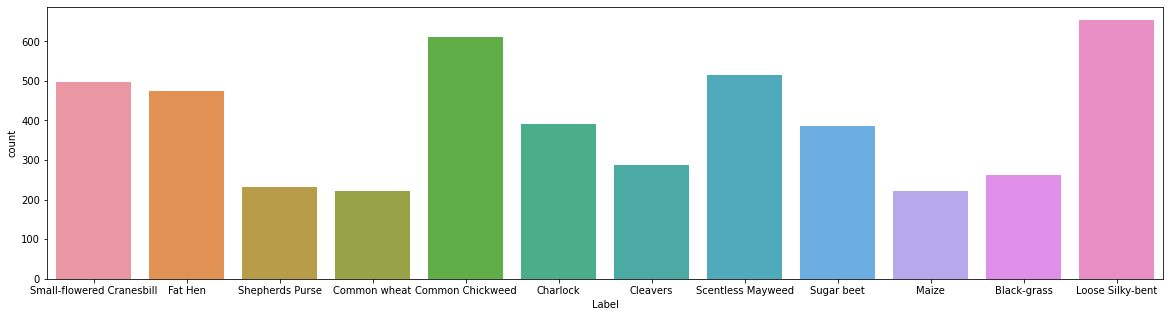

In [12]:
plt.figure(figsize=(20,5));
ax = sns.countplot(x="Label", data=labels)

- Label file content 4750 rows classified in 12 uniques species.

In [13]:
label_dict =  {0:'Small-flowered Cranesbill', 1:'Fat Hen', 2:'Shepherds Purse', 3:'Common wheat', 4:'Common Chickweed', 5:'Charlock', 6:'Cleavers', 7:'Scentless Mayweed', 8:'Sugar beet', 9:'Maize', 10:'Black-grass', 11:'Loose Silky-bent'} # given number to species name

In [73]:
# Converting labels from string to integers
y=labels.copy()      # copy labels into y

In [16]:
y[y.Label=='Small-flowered Cranesbill']=0
y[y.Label=='Fat Hen']=1
y[y.Label=='Shepherds Purse']=2
y[y.Label=='Common wheat']=3
y[y.Label=='Common Chickweed']=4
y[y.Label=='Charlock']=5
y[y.Label=='Cleavers']=6
y[y.Label=='Scentless Mayweed']=7
y[y.Label=='Sugar beet']=8
y[y.Label=='Maize']=9
y[y.Label=='Black-grass']=10
y[y.Label=='Loose Silky-bent']=11

In [17]:
#X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.Label.values # Convert the labels to numpy array to feed into the supervised learning model.

In [18]:
type(y)

numpy.ndarray

In [19]:
y.shape

(4750,)

In [20]:
type(dataset)

numpy.ndarray

In [21]:
dataset.shape

(4750, 128, 128, 3)

In [22]:
dataset[0,:,:,:].shape

(128, 128, 3)

In [23]:
dataset[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [24]:
label_dict

{0: 'Small-flowered Cranesbill',
 1: 'Fat Hen',
 2: 'Shepherds Purse',
 3: 'Common wheat',
 4: 'Common Chickweed',
 5: 'Charlock',
 6: 'Cleavers',
 7: 'Scentless Mayweed',
 8: 'Sugar beet',
 9: 'Maize',
 10: 'Black-grass',
 11: 'Loose Silky-bent'}

 Label 
 Label Id: 0 
 Name: Small-flowered Cranesbill


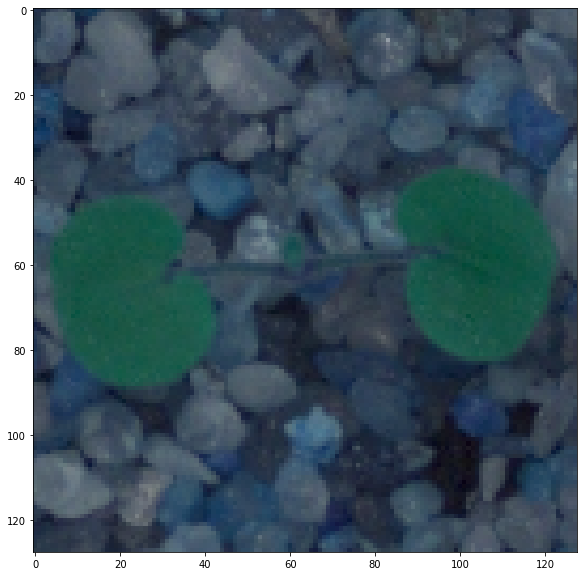

In [41]:
i = 0
image = dataset[i]
label = y[i]
print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
#print('name =', label)
plt.figure(figsize=(20,10));
plt.imshow(image);

- imagens file contains 4750 images.
- The size of each image is 128x128 pixels.
- Each image has 3 color channels.

# 2. Data Pre-processing:
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing

In [59]:
X = dataset.copy()

In [60]:
type(X)

numpy.ndarray

In [61]:
X[0]  # dataset[0] above shows integers

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [62]:
X.shape

(4750, 128, 128, 3)

In [63]:
X[0].shape

(128, 128, 3)

In [64]:
new_x = X.copy()

In [65]:
# Now we apply the gaussian blur to each 128x128x3 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
    new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)
  # new_x[idx] = cv2.bilateralFilter(img,9,75,75)
  # new_x[idx] = cv2.medianBlur(img,5)
  #new_x[idx] = cv2.blur(img,(5,5))

<function matplotlib.pyplot.show>

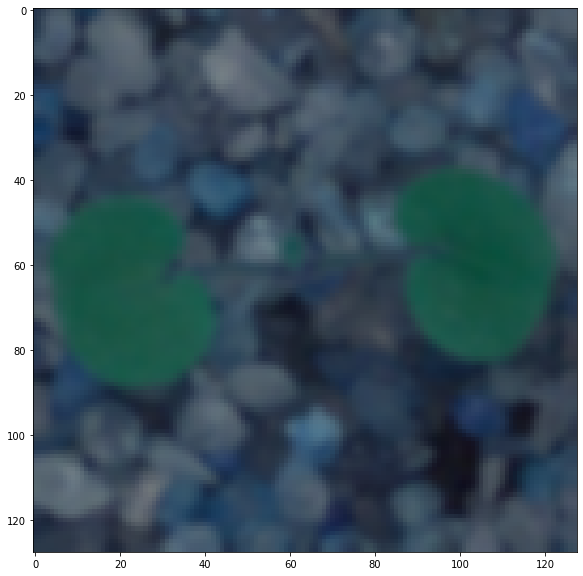

In [66]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.figure(figsize=(20,10));
plt.imshow(new_x[i]);
plt.show

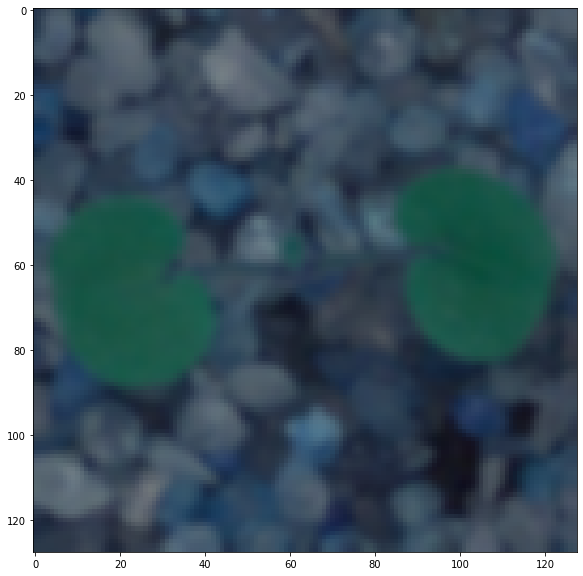

In [67]:
# JUST FOR COMPARISON
X = new_x.copy()
# Plot the de-noised image generated by applying Gaussian blur.
plt.figure(figsize=(20,10));
plt.imshow(X[i]);

In [69]:
# a).- Normalization
X = X.astype('float32') # Conversion to float type from integer type.
X /= 255.0 # Division by 255

In [70]:
X

array([[[[0.14117648, 0.2       , 0.2901961 ],
         [0.15294118, 0.21176471, 0.29803923],
         [0.1882353 , 0.24705882, 0.3254902 ],
         ...,
         [0.30588236, 0.36862746, 0.43137255],
         [0.30588236, 0.3647059 , 0.42745098],
         [0.30588236, 0.3647059 , 0.42745098]],

        [[0.14509805, 0.20392157, 0.2901961 ],
         [0.16078432, 0.21960784, 0.3019608 ],
         [0.2       , 0.2627451 , 0.3372549 ],
         ...,
         [0.30980393, 0.36862746, 0.43137255],
         [0.30980393, 0.36862746, 0.42745098],
         [0.30980393, 0.3647059 , 0.42352942]],

        [[0.14901961, 0.21176471, 0.29411766],
         [0.17254902, 0.23529412, 0.30980393],
         [0.22352941, 0.28627452, 0.35686275],
         ...,
         [0.30980393, 0.3647059 , 0.42352942],
         [0.30980393, 0.36862746, 0.42352942],
         [0.30980393, 0.36862746, 0.42352942]],

        ...,

        [[0.15294118, 0.21176471, 0.2784314 ],
         [0.15686275, 0.21568628, 0.28235295]

# 3. Make data compatible:
a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.


In [71]:
type(y)

numpy.ndarray

In [75]:
# a).- Convert labels to one-hot-vectors
y = pd.get_dummies(y)     # its a datadrame

In [76]:
y = y.values   # converting back to numpay

In [77]:
# b).- print the label for y[0]
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [78]:
type(X)

numpy.ndarray

In [79]:
# c).- Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)   # test_size = 0.3

In [80]:
# Split test data into data into test and validation
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)   # test_size = 0.5

In [81]:
print('X_train shape :',X_train.shape, len(X_train)/len(X)*100,'% of total data')
print('y_train shape :',y_train.shape, len(y_train)/len(y)*100,'% of total data')
print('\n')
print('X_validation shape :',X_validation.shape, round(len(X_validation)/len(X)*100,1),'% of total data')
print('y_validation shape :',y_validation.shape, round(len(y_validation)/len(y)*100,1),'% of total data')
print('\n')
print('X_test shape :',X_test.shape, round(len(X_test)/len(X)*100,1),'% of total data')
print('y_test shape :',y_test.shape, round(len(y_test)/len(y)*100,1),'% of total data')

X_train shape : (3325, 128, 128, 3) 70.0 % of total data
y_train shape : (3325, 12) 70.0 % of total data


X_validation shape : (712, 128, 128, 3) 15.0 % of total data
y_validation shape : (712, 12) 15.0 % of total data


X_test shape : (713, 128, 128, 3) 15.0 % of total data
y_test shape : (713, 12) 15.0 % of total data


In [82]:
# d).- Input shape
input_shape = X_train.shape[1:]

In [83]:
input_shape

(128, 128, 3)

# 4).- Building CNN:
a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.


In [84]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

# Number of parameters in the CNN layers:

- ## Number of Parameters of a Conv Layer:
In a CNN, each layer has two kinds of parameters : weights and biases. The total number of parameters is just the sum of all weights and biases.

  Let’s define,

  - W_c = Number of weights of the Conv Layer.
  - B_c = Number of biases of the Conv Layer.
  - P_c = Number of parameters of the Conv Layer.
  - K = Size (width) of kernels used in the Conv Layer.
  - N = Number of kernels.
  - C = Number of channels of the input image.

    W<sub>c</sub> = K<sup>2</sup> x C x N
    
    B<sub>c</sub> = N

    P<sub>c</sub> = W<sub>c</sub> + B<sub>c</sub>


  So, we will use this formulae for our parameter calculation of first layer:
    
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))

  So the number of parameters is given by:

  Number of weights = W<sub>c</sub> = 5<sup>2</sup> x 3 x 32 = 2400

  Number of biases = B<sub>c</sub> = 32

  Total number of parameters for this layer = P<sub>c</sub> = 2400 + 32 = 2432


  We can verify this number by looking at the model summary.

    conv2d (Conv2D)              (None, 32, 32, 32)        2432

- ## Number of Parameters of a MaxPool Layer:
There are no parameters associated with a MaxPool layer. The pool size, stride, and padding are hyperparameters.

- ## Number of Parameters of a Fully Connected (FC) Layer:
There are two kinds of fully connected layers in a CNN. The first FC layer is connected to the last Conv Layer, while later FC layers are connected to other FC layers. Let’s consider each case separately.

  - ### Case 1: Number of Parameters of a Fully Connected (FC) Layer connected to a Conv Layer:
  Let’s define,

    W_{cf} = Number of weights of a FC Layer which is connected to a Conv Layer.

    B_{cf} = Number of biases of a FC Layer which is connected to a Conv Layer.
    
    O = Size (width) of the output image of the previous Conv Layer.
    
    N = Number of kernels in the previous Conv Layer.
    
    F = Number of neurons in the FC Layer.

      - W<sub>cf</sub> = O<sup>2</sup> x N x F
    
      - B<sub>cf</sub> = F

      - P<sub>cf</sub> = W<sub>cf</sub> + B<sub>cf</sub>

    Example: The first fully connected layer of our model is connected to a Conv Layer. For this layer, O = 1 (the width and height of image after global maxpooling), N = 64 and F = 256. Therefore,

      - Number of weights = W<sub>cf</sub> = 1<sup>2</sup> x 64 x 256 = 16384

      - Number of biases = B<sub>c</sub> = 256

      - Total number of parameters for this layer = P<sub>c</sub> = 16384 + 256 = 16640

    We can verify this number by looking at the model summary.
      
            dense (Dense)                (None, 256)               16640 

  - ### Case 2: Number of Parameters of a Fully Connected (FC) Layer connected to a FC Layer
  Let’s define,

    W<sub>ff</sub> = Number of weights of a FC Layer which is connected to an FC Layer.

    B<sub>ff</sub> = Number of biases of a FC Layer which is connected to an FC Layer.
    
    P<sub>ff</sub> = Number of parameters of a FC Layer which is connected to an FC Layer.
    
    F = Number of neurons in the FC Layer.
    
    F<sub>-1</sub> = Number of neurons in the previous FC Layer.

      - W<sub>ff</sub> = F<sub>-1</sub> x F

      - B<sub>ff</sub> = F

      - P<sub>ff</sub> = W<sub>ff</sub> + B<sub>ff</sub>

    In the above equation, **F<sub>-1</sub> x F** is the total number of connection weights from neurons of the previous FC Layer the neurons of the current FC Layer. The total number of biases is the same as the number of neurons (F).

    Example: The last fully connected layer of AlexNet is connected to an FC Layer. For this layer, **F<sub>-1</sub>** = 256 and **F** = 10. Therefore,

      - Number of weights = W<sub>cf</sub> = 256 x 12 = 3072

      - Number of biases = B<sub>c</sub> = 12

      - Total number of parameters for this layer = P<sub>c</sub> = 3072 + 12 = 3084

    We can verify this number by looking at the model summary.
      
            dense_1 (Dense)              (None, 10)                3084

## Please Note:
> Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

https://keras.io/api/layers/activations/

<h3>Conv2D:<h3/>

- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

<h3>Activation('relu'):<h3/>

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

<h3>MaxPooling2D:<h3/>

- The objective MaxPooling Layer is to down-sample an input representation.
- This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn.

<h3>Dropout:<h3/>

- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training half of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

<h3>Dense:<h3/>

- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

<h3>Softmax:<h3/>

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

## Add-on:
How to handle multilabel classification?

<h4>When training the network, what you want is minimize the cost by applying a algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something. You have to study how each algorithm works to choose what to use, but AdamOptimizer works find for most cases in general.<h4/>

In [85]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [86]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Add-on:
Which loss function to use? It depends :)

https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

In [87]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [88]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_validation = X_validation.reshape(X_validation.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


# 5. Fit and evaluate model and print confusion matrix

<h2>Fit the model:<h2/>

-  We can fit this model with 40 epochs and a batch size of 32.

- A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

In [89]:
batch_size = 32
epochs = 5

In [ ]:
## MODEL WAS RUN WITHOUT GAUSSIAN BRURRING APPLICATION
#history = model.fit(X_train,
#                    y_train,
#                    batch_size=batch_size,
#                    epochs=epochs,
#                    validation_data=(X_validation, y_validation),
#                    shuffle=True,
#                    verbose=1,
#                    callbacks=[early_stopping,model_checkpoint])

# plot training history
#plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='validation')
#plt.legend()
#plt.show()

Epoch 1/5
104/104 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.8042
Epoch 00001: val_loss improved from 0.65031 to 0.54990, saving model to cifar_cnn_checkpoint_01_loss0.5499.h5
104/104 [==============================] - 631s 6s/step - loss: 0.5824 - accuracy: 0.8042 - val_loss: 0.5499 - val_accuracy: 0.8413
Epoch 2/5
104/104 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.8117
Epoch 00002: val_loss did not improve from 0.54990
104/104 [==============================] - 631s 6s/step - loss: 0.5615 - accuracy: 0.8117 - val_loss: 0.6101 - val_accuracy: 0.7992
Epoch 3/5
104/104 [==============================] - ETA: 0s - loss: 0.5749 - accuracy: 0.8012
Epoch 00003: val_loss did not improve from 0.54990
104/104 [==============================] - 630s 6s/step - loss: 0.5749 - accuracy: 0.8012 - val_loss: 0.6480 - val_accuracy: 0.7978
Epoch 4/5
104/104 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.8108
Epoch 00004:

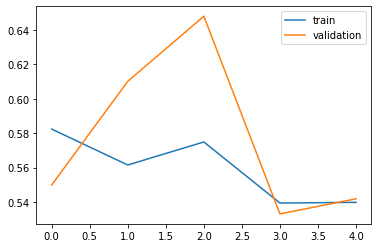

In [97]:
# MODEL RUN WITH GAUSSIAN BRURRING APPLICATION
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_validation, y_validation),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

#plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [98]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 26s 1s/step - loss: 0.5820 - accuracy: 0.8331
Test loss: 0.5819979906082153
Test accuracy: 0.8330996036529541


<h3>The above score shows that the accuracy is good, as we used number of epochs = 30.
If we use more epochs and tune the hyper-parameters more then we can get some more accuracy score. As our focus on the case study was to learn about the use of CNNs for image classification, we needed to run the code thoroughly so we set number of epochs to less. <h3/>

In [100]:
y_pred = model.predict(X_test)    # Get predicting

In [101]:
y_pred.shape

(713, 12)

In [102]:
print("=== Confusion Matrix ===")
#cm = confusion_matrix(y_test, y_predict)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

=== Confusion Matrix ===
[[18  0  0  2  1  6 14  0  1  0  0  1]
 [ 0 52  1  0  0  2  0  2  1  0  0  1]
 [ 0  5 34  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  1  1  1  0  0]
 [ 0  0  0  0 35  0  1  0  0  0  0  0]
 [ 0  0  0  2  0 58  1  0  0  0  1  0]
 [16  0  0  1  2  0 69  0  1  0  0  1]
 [ 0  0  0  0  0  2  1 33  1  0  0  1]
 [ 0  1  0  2  0  1  2  1 69  4  1  2]
 [ 0  0  0  5  0  0  0  0  4 15  0  0]
 [ 0  0  1  2  0  0  0  6  0  1 74  0]
 [ 0  0  1  2  0  6  0  0  5  0  0 48]]


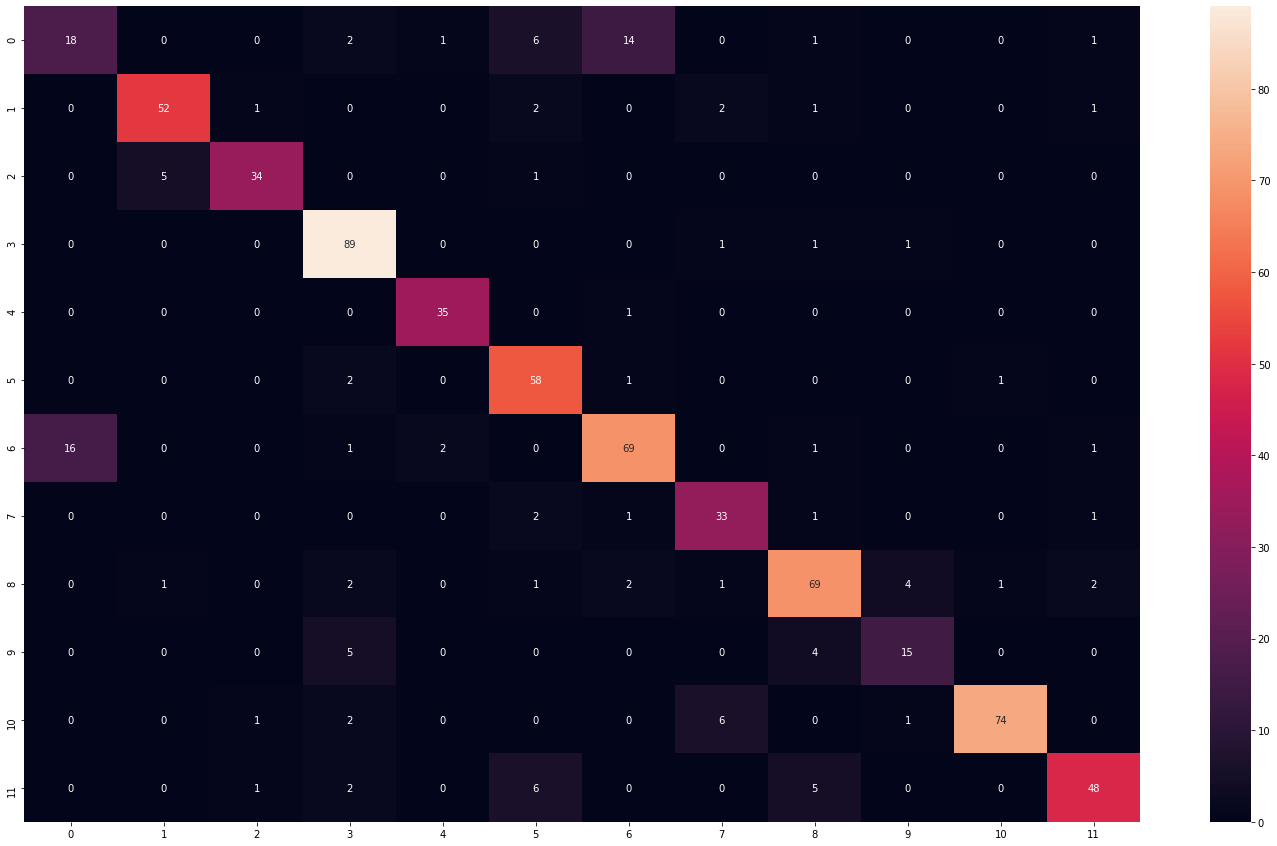

In [104]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (25,15))
sns.heatmap(df_cm, annot=True, fmt='d')

#plt.show()

In [107]:
print("=== Classification Report ===")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.53      0.42      0.47        43
           1       0.90      0.88      0.89        59
           2       0.92      0.85      0.88        40
           3       0.85      0.97      0.90        92
           4       0.92      0.97      0.95        36
           5       0.76      0.94      0.84        62
           6       0.78      0.77      0.78        90
           7       0.77      0.87      0.81        38
           8       0.83      0.83      0.83        83
           9       0.71      0.62      0.67        24
          10       0.97      0.88      0.93        84
          11       0.89      0.77      0.83        62

    accuracy                           0.83       713
   macro avg       0.82      0.81      0.81       713
weighted avg       0.83      0.83      0.83       713



# 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [108]:
np.nonzero(y_pred.argmax(axis=1)!= y_test.argmax(axis=1))

(array([  2,  28,  42,  45,  52,  55,  60,  64,  69,  71,  77,  88,  91,
         94,  98, 101, 113, 115, 120, 123, 128, 129, 131, 135, 138, 140,
        141, 143, 153, 154, 158, 159, 162, 165, 166, 191, 198, 208, 211,
        213, 214, 221, 230, 240, 261, 263, 271, 275, 277, 280, 294, 306,
        309, 313, 314, 319, 322, 329, 332, 335, 342, 343, 349, 350, 358,
        364, 366, 376, 382, 387, 391, 394, 396, 399, 402, 408, 410, 417,
        421, 450, 455, 456, 457, 466, 479, 482, 484, 511, 513, 515, 533,
        548, 559, 567, 568, 580, 590, 598, 602, 605, 610, 619, 626, 650,
        651, 653, 656, 658, 660, 661, 664, 666, 670, 679, 683, 685, 696,
        700, 710]),)

Prediction : Common wheat
Test : Maize


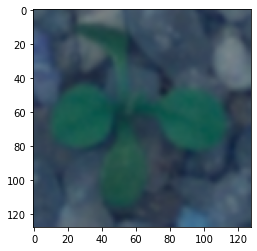

In [110]:
print('Prediction :',label_dict[y_pred[2,:].argmax()])
plt.imshow(X_test[2]);
print('Test :',label_dict[y_test[2,:].argmax()])

Prediction : Cleavers
Test : Cleavers


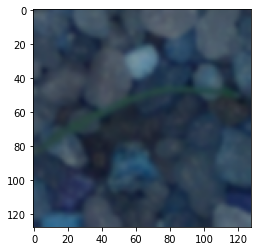

In [112]:
print('Prediction :',label_dict[y_pred[3,:].argmax()])
plt.imshow(X_test[3]);
print('Test :',label_dict[y_test[3,:].argmax()])

Prediction : Sugar beet
Test : Sugar beet


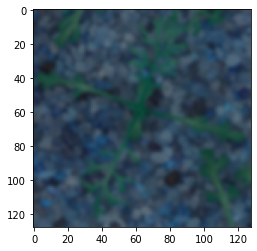

In [113]:
print('Prediction :',label_dict[y_pred[33,:].argmax()])
plt.imshow(X_test[33]);
print('Test :',label_dict[y_test[33,:].argmax()])

Prediction : Scentless Mayweed
Test : Scentless Mayweed


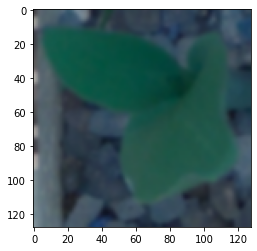

In [114]:
print('Prediction :',label_dict[y_pred[36,:].argmax()])
plt.imshow(X_test[36]);
print('Test :',label_dict[y_test[36,:].argmax()])